In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, entropy, iqr, spearmanr
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('paper',font_scale=1.8)
sns.despine()
import itertools
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

## Home data analysis

In [2]:
Datahome = pd.read_csv('GPSandClinicalData_Home.csv')

In [3]:
Datahome['Duration_Wearing']=Datahome['Duration']*Datahome['Wear Frac']

In [4]:
Datahome.head()

,Wear Frac,Duration,Mean Speed,SubjID,NewBrace,LocID,Steps,Steps per Hour,Steps per Hour Wear,Date,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast,Duration_Wearing
0,0.033473,2.652778,0.076119,CBR21,1,0,30,11.308901,337.853403,2016-08-18,65,poliomyelitis,60.0,231.93,0.69,0.85,0.088796
1,0.000000,18.044444,0.037787,CBR21,1,0,0,0.000000,NaN,2016-08-19,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
2,0.000000,4.041667,0.063728,CBR21,1,0,0,0.000000,NaN,2016-08-19,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
3,0.000000,12.708333,0.046796,CBR21,1,0,0,0.000000,NaN,2016-08-20,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000
4,0.000000,1.600000,0.212844,CBR21,1,0,0,0.000000,NaN,2016-08-20,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000


In [5]:
# plt.figure(figsize=(16,5))
# sns.boxplot(data=Datahome,x='SubjID',y='Duration_Wearing',hue='NewBrace')
# plt.title('Usage time at Home')

In [6]:
#compute mean duration/day for each participant
ind = 0
cols = ['SubjID','Duration_Mean','Duration_Median','UsageFrac','NewBrace']
homedur = pd.DataFrame(data=[],columns=cols)
for newbrace in Datahome.NewBrace.unique():
    for s in Datahome.SubjID.unique():
        d = Datahome[(Datahome.SubjID==s)&(Datahome.NewBrace==newbrace)]
        meandur = (d['Duration']).mean()
        mediandur =(d['Duration']).median()
        UsageFrac = np.sum(d['Wear Frac']*d['Duration'])/np.sum(d['Duration'])
        sixmwt = np.mean(d['6mwt'])
        steps = np.nanmean(d['Steps'])
        stepsHr = np.nanmean(d['Steps per Hour'])
        dailydur = []
        for dates in d['Date']:
            dailydur.append(d.loc[d['Date']==dates,'Duration'].sum()) #daily time 
        if s=='CBR22':
            print(dailydur)
            
        meddailydur = np.median(dailydur)
        
        homedur_ = pd.DataFrame({cols[0]:s, cols[1]:meandur, cols[2]:mediandur, cols[3]:UsageFrac,
                                 cols[4]:newbrace, '6mwt':sixmwt, 'Steps':steps, 'Steps per Hour':stepsHr,
                                 'Daily Duration':meddailydur},index=[ind])
        homedur = pd.concat([homedur,homedur_])
        ind+=1

[0.20833333333333331, 0.0625, 0.22277777777777774, 0.22277777777777774, 0.11527777777777777, 0.15833333333333333, 0.17388888888888887, 0.44722222222222224, 0.6697222222222221, 0.41000000000000003, 0.41000000000000003, 0.5505555555555556]
[0.6658333333333334, 6.896111111111113, 0.2833333333333334, 0.4211111111111111]


In [7]:
homedur.head()

,6mwt,Daily Duration,Duration_Mean,Duration_Median,NewBrace,Steps,Steps per Hour,SubjID,UsageFrac
0,231.93,17.071111,6.799006,6.284861,1.0,13.660000,2.340173,CBR21,0.019349
1,452.17,13.980556,5.065320,3.038611,1.0,512.576471,223.327430,CBR30,0.360443
2,332.61,0.222778,0.251551,0.185833,1.0,77.666667,370.787233,CBR22,0.847683
3,78.82,23.997222,21.142396,23.997222,1.0,15.062500,0.776636,CBR27,0.004478
4,512.14,21.665000,11.163413,9.988889,1.0,134.476190,54.806503,CBR26,0.050284


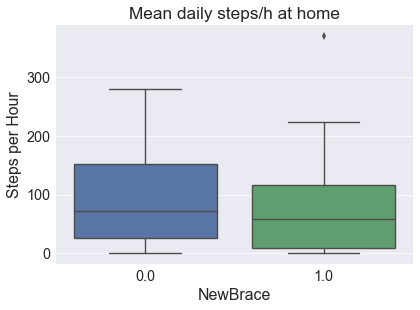

In [8]:
sns.boxplot(x='NewBrace',y='Steps per Hour',data=homedur)
plt.title('Mean daily steps/h at home')

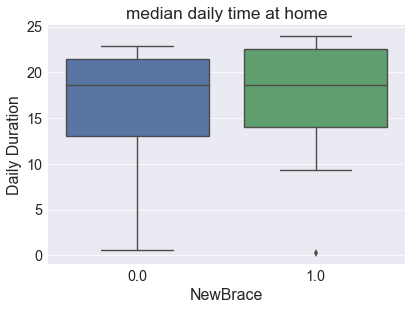

In [9]:
sns.boxplot(x='NewBrace',y='Daily Duration',data=homedur)
plt.title('median daily time at home')

## Community data analysis

In [10]:
# Data = pd.read_csv('GPSData.csv')
Data = pd.read_csv('GPSandClinicalData.csv')

In [11]:
Data.head()

,Wear Frac,DestinationType,Distance,Duration,Mean Speed,TripDuration,Relative_Freq,Relative_Duration,SubjID,NewBrace,...,Date,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast,Mean Lat,Mean Lon,LocID
0,0.015000,Res,12.229512,2.772222,0.215601,0.017824,0.014925,0.021452,CBR21,1,...,2016-08-18,65,poliomyelitis,60.0,231.93,0.69,0.85,41.732207,-88.132441,2
1,0.063091,Inst,6.302016,1.758333,0.230411,0.011921,0.014925,0.013607,CBR21,1,...,2016-08-18,65,poliomyelitis,60.0,231.93,0.69,0.85,41.783632,-88.188553,3
2,0.000000,Com,5.095353,1.016389,0.591493,0.008218,0.014925,0.007865,CBR21,1,...,2016-08-19,65,poliomyelitis,60.0,231.93,0.69,0.85,41.765985,-88.206360,4
3,0.000000,Com,5.172335,0.366111,1.607549,0.001505,0.029851,0.004252,CBR21,1,...,2016-08-19,65,poliomyelitis,60.0,231.93,0.69,0.85,41.760925,-88.208135,5
4,0.000000,Com,2.871296,0.052778,4.483316,0.003704,0.044776,0.001827,CBR21,1,...,2016-08-19,65,poliomyelitis,60.0,231.93,0.69,0.85,41.760981,-88.242395,6


In [12]:
Data.columns

Index(['Wear Frac', 'DestinationType', 'Distance', 'Duration', 'Mean Speed',
       'TripDuration', 'Relative_Freq', 'Relative_Duration', 'SubjID',
       'NewBrace', 'Steps', 'Steps per Hour', 'Steps per Hour Wear', 'Date',
       'Age', 'Diagnosis', 'BaselineYrs', '6mwt', '10mwt_ss', '10mwt_fast',
       'Mean Lat', 'Mean Lon', 'LocID'],
      dtype='object')

In [13]:
Data['Duration_Wearing']=Data['Duration']*Data['Wear Frac']

In [14]:
len(Data)

2181

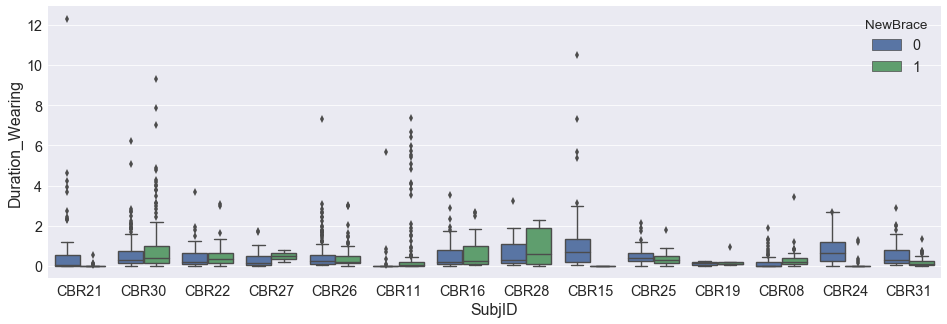

In [15]:
plt.figure(figsize=(16,5))
sns.boxplot(data=Data,x='SubjID',y='Duration_Wearing',hue='NewBrace')

In [16]:
#compute mean duration/day for each participant
ind = 0
cols = ['SubjID','Duration_Mean','Duration_Median','UsageFrac','NewBrace']
dur = pd.DataFrame(data=[],columns=cols)
for newbrace in Data.NewBrace.unique():
    for s in Data.SubjID.unique():
        d = Data[(Data.SubjID==s)&(Data.NewBrace==newbrace)]
        meandur = (d['Duration']*d['Wear Frac']).mean()
        mediandur =(d['Duration']*d['Wear Frac']).median()
        UsageFrac = np.sum(d['Wear Frac']*d['Duration'])/np.sum(d['Duration'])
        steps = np.nanmean(d['Steps'])
        stepsHr = np.nanmean(d['Steps per Hour'])
        
        dailydur = []
        for dates in d['Date']:
            dailydur.append(d.loc[d['Date']==dates,'Duration'].sum()) #daily time in the community
#         if s=='CBR15':
#             print(dailydur)
            
        meddailydur = np.median(dailydur)
        
        dur_ = pd.DataFrame({cols[0]:s, cols[1]:meandur, cols[2]:mediandur, cols[3]:UsageFrac,
                                 cols[4]:newbrace, 'Steps':steps, 'Steps per Hour':stepsHr,
                             "Daily Duration":meddailydur},index=[ind])
        dur = pd.concat([dur,dur_])
        ind+=1

In [17]:
subjmobility=dur['Daily Duration']/homedur['Daily Duration']

In [18]:
dur.head()

,Daily Duration,Duration_Mean,Duration_Median,NewBrace,Steps,Steps per Hour,SubjID,UsageFrac
0,5.595833,0.013730,0.000000,1.0,2.283582,13.478047,CBR21,0.007118
1,7.388889,0.911458,0.378333,1.0,286.632184,386.364495,CBR30,0.910122
2,4.285000,0.533504,0.352778,1.0,96.019608,222.484325,CBR22,0.241715
3,0.491389,0.491389,0.491389,1.0,51.000000,100.778111,CBR27,1.000000
4,2.408611,0.480683,0.213889,1.0,134.064935,361.052923,CBR26,0.896616


## Combined Home-Community analysis

In [19]:
#summary plot
homedur['Loc']='Home'
dur['Loc']='Community'
durdata = pd.concat([homedur,dur])

In [20]:
durdata.head()

,6mwt,Daily Duration,Duration_Mean,Duration_Median,Loc,NewBrace,Steps,Steps per Hour,SubjID,UsageFrac
0,231.93,17.071111,6.799006,6.284861,Home,1.0,13.660000,2.340173,CBR21,0.019349
1,452.17,13.980556,5.065320,3.038611,Home,1.0,512.576471,223.327430,CBR30,0.360443
2,332.61,0.222778,0.251551,0.185833,Home,1.0,77.666667,370.787233,CBR22,0.847683
3,78.82,23.997222,21.142396,23.997222,Home,1.0,15.062500,0.776636,CBR27,0.004478
4,512.14,21.665000,11.163413,9.988889,Home,1.0,134.476190,54.806503,CBR26,0.050284


In [21]:
print('MedianHome Baseline = %.2f h'%homedur[homedur['NewBrace']==0]['Duration_Median'].median())
print('MedianHome Cbrace = %.2f h'%homedur[homedur['NewBrace']==1]['Duration_Median'].median())
print('MedianComm Baseline = %.2f h'%dur[dur['NewBrace']==0]['Duration_Median'].median())
print('MedianComm Cbrace = %.2f h'%dur[dur['NewBrace']==1]['Duration_Median'].median())

MedianHome Baseline = 7.62 h
MedianHome Cbrace = 9.27 h
MedianComm Baseline = 0.22 h
MedianComm Cbrace = 0.21 h


In [22]:
# print('MedianHome difference = %.2f h'%(homedur[homedur['NewBrace']==1]['Duration_Median'].median() - 
#      homedur[homedur['NewBrace']==0]['Duration_Median'].median()))

# print('MedianComm difference = %.2f h'%(homedur[homedur['NewBrace']==1]['Duration_Median'].median() - 
#      homedur[homedur['NewBrace']==0]['Duration_Median'].median()))


In [23]:
dur.head()

,Daily Duration,Duration_Mean,Duration_Median,NewBrace,Steps,Steps per Hour,SubjID,UsageFrac,Loc
0,5.595833,0.013730,0.000000,1.0,2.283582,13.478047,CBR21,0.007118,Community
1,7.388889,0.911458,0.378333,1.0,286.632184,386.364495,CBR30,0.910122,Community
2,4.285000,0.533504,0.352778,1.0,96.019608,222.484325,CBR22,0.241715,Community
3,0.491389,0.491389,0.491389,1.0,51.000000,100.778111,CBR27,1.000000,Community
4,2.408611,0.480683,0.213889,1.0,134.064935,361.052923,CBR26,0.896616,Community


In [24]:
Fboth.head()

NameError: name 'Fboth' is not defined

NameError: name 'Fboth' is not defined

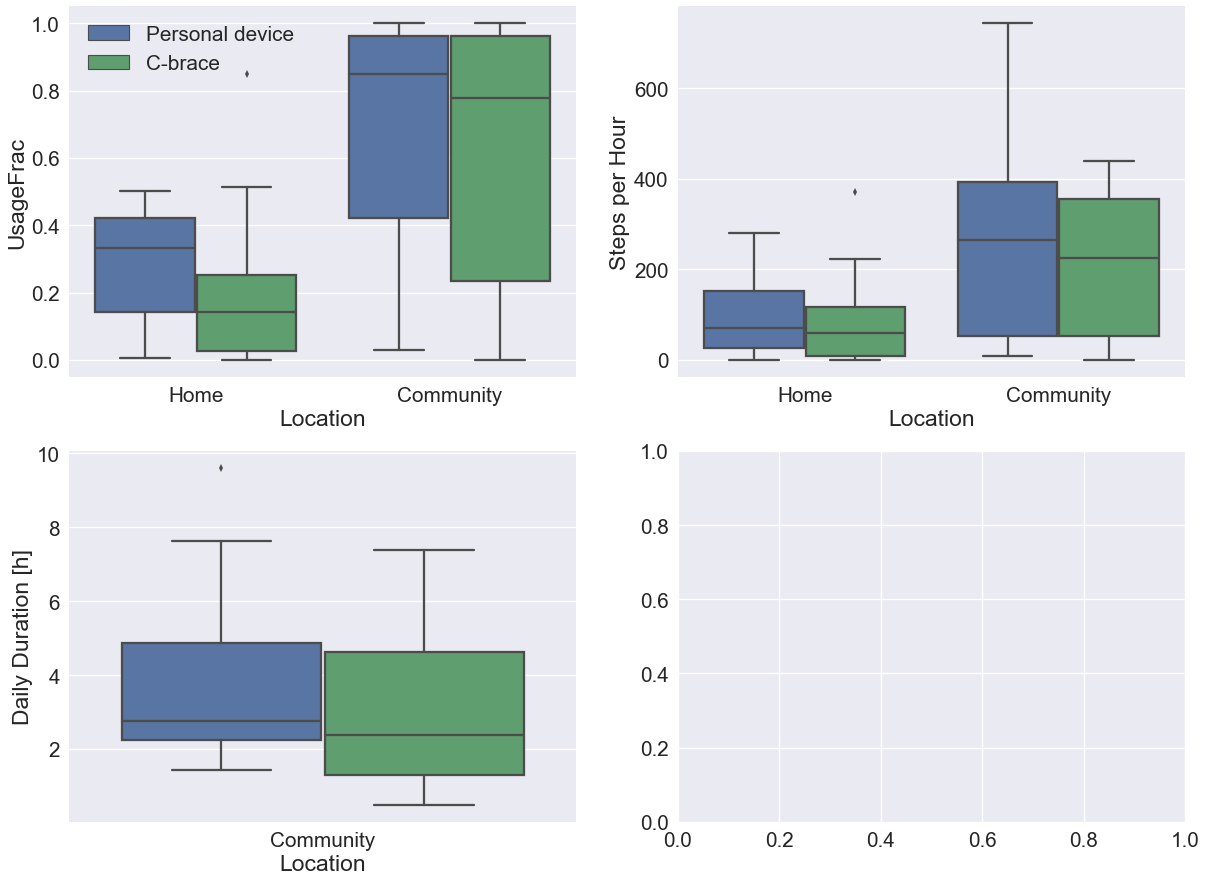

In [25]:
sns.set_context('talk',font_scale=1.6)
fig=plt.figure(figsize=(20,15))
fig.add_subplot(221)
ax = sns.boxplot(data=durdata,x='Loc',y='UsageFrac',hue='NewBrace')
L=ax.legend(loc=2)
L.get_texts()[0].set_text('Personal device')
L.get_texts()[1].set_text('C-brace')
# ax.legend(_,['Personal device','C-brace'],loc=2)
plt.xlabel('Location')
sns.despine()
fig.add_subplot(222)
ax=sns.boxplot(data=durdata,x='Loc',y='Steps per Hour',hue='NewBrace')
ax.legend_.remove()
plt.xlabel('Location')
sns.despine()
fig.add_subplot(223)
ax=sns.boxplot(data=dur,x='Loc',y='Daily Duration',hue='NewBrace')
ax.legend_.remove()
sns.despine()
plt.xlabel('Location')
plt.ylabel('Daily Duration [h]')

fig.add_subplot(224)
f = 'UsageFrac'
x = Fboth[Fboth['NewBrace']==0][f]
y = Fboth[Fboth['NewBrace']==1][f]
plt.scatter(x,y)    
mx=min(x)
my=min(y)
m = min(mx,my)
Mx=max(x)
My=max(y)
M =max(Mx,My)
plt.plot([m,M],[m,M])
plt.title('Usage Fraction')
plt.xlabel('Personal device')
plt.ylabel('C-brace')
sns.despine()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.3, hspace=0.4)
sns.despine()

In [ ]:
np.std(y-x)

In [26]:
homedur

,6mwt,Daily Duration,Duration_Mean,Duration_Median,NewBrace,Steps,Steps per Hour,SubjID,UsageFrac,Loc
0,231.93,17.071111,6.799006,6.284861,1.0,13.660000,2.340173,CBR21,0.019349,Home
1,452.17,13.980556,5.065320,3.038611,1.0,512.576471,223.327430,CBR30,0.360443,Home
2,332.61,0.222778,0.251551,0.185833,1.0,77.666667,370.787233,CBR22,0.847683,Home
3,78.82,23.997222,21.142396,23.997222,1.0,15.062500,0.776636,CBR27,0.004478,Home
4,512.14,21.665000,11.163413,9.988889,1.0,134.476190,54.806503,CBR26,0.050284,Home
5,344.42,14.140972,5.579847,2.559722,1.0,142.637931,96.748401,CBR11,0.150211,Home
6,419.40,18.547222,6.510024,5.866667,1.0,411.826087,140.139530,CBR16,0.260187,Home
7,356.29,23.997222,21.472107,23.997222,1.0,145.965517,8.258904,CBR28,0.050431,Home
8,300.41,18.741667,9.987222,9.258889,1.0,0.000000,0.000000,CBR15,0.000000,Home
9,290.50,23.996667,18.317300,23.996667,1.0,1079.697674,64.891683,CBR25,0.224935,Home


In [27]:
homedur[homedur['NewBrace']==1]['UsageFrac'].median()-homedur[homedur['NewBrace']==0]['UsageFrac'].median()

-0.18813454846693317

In [28]:
print('MedianHome Baseline = %.2f'%homedur[homedur['NewBrace']==0]['UsageFrac'].median())
print('MedianHome Cbrace = %.2f'%homedur[homedur['NewBrace']==1]['UsageFrac'].median())
# print('MedianHome differnce = %.2f'%homedur[homedur['NewBrace']==1]['UsageFrac'].median()-homedur[homedur['NewBrace']==1]['UsageFrac'].median())

print('MedianComm Baseline = %.2f'%dur[dur['NewBrace']==0]['UsageFrac'].median())
print('MedianComm Cbrace = %.2f'%dur[dur['NewBrace']==1]['UsageFrac'].median())

print('MedianHome Baseline Steps = %.2f'%homedur[homedur['NewBrace']==0]['Steps per Hour'].median())
print('MedianHome Cbrace Steps = %.2f'%homedur[homedur['NewBrace']==1]['Steps per Hour'].median())
print('MedianComm Baseline Steps = %.2f'%dur[dur['NewBrace']==0]['Steps per Hour'].median())
print('MedianComm Cbrace Steps = %.2f'%dur[dur['NewBrace']==1]['Steps per Hour'].median())

print('MedianComm Baseline DailyTime = %.2f h'%dur[dur['NewBrace']==0]['Daily Duration'].median())
print('MedianComm Cbrace DailyTime = %.2f h'%dur[dur['NewBrace']==1]['Daily Duration'].median())

print('\nDaily duration IQR Baseline')
print(np.percentile(dur[dur['NewBrace']==0]['Daily Duration'].values,25),np.percentile(dur[dur['NewBrace']==0]['Daily Duration'].values,75))
print('\nDaily duration IQR Cbrace')
print(np.percentile(dur[dur['NewBrace']==1]['Daily Duration'].values,25),np.percentile(dur[dur['NewBrace']==1]['Daily Duration'].values,75))


MedianHome Baseline = 0.33
MedianHome Cbrace = 0.14
MedianComm Baseline = 0.85
MedianComm Cbrace = 0.78
MedianHome Baseline Steps = 71.89
MedianHome Cbrace Steps = 59.23
MedianComm Baseline Steps = 264.19
MedianComm Cbrace Steps = 224.94
MedianComm Baseline DailyTime = 2.77 h
MedianComm Cbrace DailyTime = 2.39 h

Daily duration IQR Baseline
2.23673611111 4.87934028033

Daily duration IQR Cbrace
1.28881944444 4.61916666667


In [29]:
# #normality test
# from scipy.stats import ttest_rel, shapiro
# x = homedur[homedur['NewBrace']==0]['Duration_Median']
# fstat,pval = shapiro(x)
# print(fstat,pval)
# y = homedur[homedur['NewBrace']==1]['Duration_Median']
# fstat,pval = shapiro(y)
# print(fstat,pval)
# x = dur[dur['NewBrace']==0]['Duration_Median']
# fstat,pval = shapiro(x)
# print(fstat,pval)
# y = dur[dur['NewBrace']==1]['Duration_Median']
# fstat,pval = shapiro(y)
# print(fstat,pval)

In [30]:
#sign rank test differences in median duration
from scipy.stats import wilcoxon
x = homedur[homedur['NewBrace']==0]['UsageFrac']
y = homedur[homedur['NewBrace']==1]['UsageFrac']
tstat,prob = wilcoxon(x,y)
print('Wear Fraction Home',tstat,prob)
x = dur[dur['NewBrace']==0]['UsageFrac']
y = dur[dur['NewBrace']==1]['UsageFrac']
tstat,prob = wilcoxon(x,y)
print('Wear Fraction Community',tstat,prob)
x = homedur[homedur['NewBrace']==0]['Steps per Hour']
y = homedur[homedur['NewBrace']==1]['Steps per Hour']
tstat,prob = wilcoxon(x,y)
print('Steps/h Home',tstat,prob)
x = dur[dur['NewBrace']==0]['Steps per Hour']
y = dur[dur['NewBrace']==1]['Steps per Hour']
tstat,prob = wilcoxon(x,y)
print('Steps/h Community',tstat,prob)
x = dur[dur['NewBrace']==0]['Daily Duration']
y = dur[dur['NewBrace']==1]['Daily Duration']
tstat,prob = wilcoxon(x,y)
print('Median Daily duration - Community',tstat,prob)


Wear Fraction Home 31.0 0.177114040864
Wear Fraction Community 44.0 0.916511907864
Steps/h Home 40.0 0.43262594902
Steps/h Community 33.0 0.220898890668
Median Daily duration - Community 28.0 0.12404279309


** The new brace does not significantly alter the wear fractions and steps per hour **

## Mobility features - Baseline

In [31]:
Featsubj = pd.DataFrame(data=[],columns=['SubjID','Age','BaselineYrs','6mWT','10mWTss','DTimeCommunity',
                                         'Steps per Hour','UsageFrac'])

In [32]:
ind = 0
for s in Data.SubjID.unique():

    ind+=1
    Data_ = Data[(Data['SubjID']==s)&(Data['NewBrace']==0)]
    
    #mobility index
    dhome = homedur[(homedur['SubjID']==s) & (homedur['NewBrace']==0)]['Daily Duration']
    dcomm = dur[(dur['SubjID']==s) & (dur['NewBrace']==0)]['Daily Duration']
    mobilityindex = dcomm.values#/dhome.values

#     UsageFrac = np.nansum(Data_['Wear Frac']*Data_['Duration'])/(np.nansum(Data_['Duration'])+1e-16)
    UsageFrac = np.nanmean(Data_['Wear Frac'])

#     steps = np.nanmean(Data_['Steps'])
    stepsHr = np.nanmean(Data_['Steps per Hour'])



    fpd=(pd.DataFrame({'SubjID':s,'Age':Data_['Age'].unique(),
                       'BaselineYrs': Data_['BaselineYrs'].unique(), 
                      '6mWT':Data_['6mwt'].unique(), '10mWTss':Data_['10mwt_ss'].unique(), 
                       'DTimeCommunity':mobilityindex,'UsageFrac':UsageFrac,
                       'Steps per Hour':stepsHr},index=[ind]))
    
    Featsubj=pd.concat([Featsubj,fpd])



In [33]:
#add OPUS data
OPUSdata= pd.read_excel('OPUS.xlsx')
sid = OPUSdata.SubjID
newstr = []
for s in sid.values:
    newstr.append(s.replace('-',''))
OPUSdata.SubjID = newstr

In [34]:
Featsubj = pd.merge(left=Featsubj,right=OPUSdata[OPUSdata['NewBrace']==0],how='inner',left_on=['SubjID'],right_on=['SubjID'])

In [35]:
Featsubj=Featsubj[['SubjID','NewBrace','Age','BaselineYrs','6mWT','10mWTss','OPUS','Steps per Hour',
                   'UsageFrac','DTimeCommunity']]

In [36]:
Featsubj

,SubjID,NewBrace,Age,BaselineYrs,6mWT,10mWTss,OPUS,Steps per Hour,UsageFrac,DTimeCommunity
0,CBR21,0,65.0,60.00,246.46,0.70,49.59,202.599660,0.625459,2.273333
1,CBR30,0,55.0,37.00,333.45,0.99,45.66,462.174627,0.982844,4.069028
2,CBR22,0,28.0,2.00,313.69,0.93,43.94,60.862118,0.734635,5.292222
3,CBR27,0,72.0,70.00,119.18,0.44,75.87,35.454795,0.978453,1.430417
4,CBR26,0,52.0,0.50,443.20,1.22,39.93,670.040958,0.997807,5.149444
5,CBR11,0,35.0,5.00,302.49,0.65,40.72,8.740960,0.020286,7.633333
6,CBR16,0,44.0,1.00,159.05,0.38,49.59,397.321966,1.000000,3.177222
7,CBR28,0,44.0,0.08,286.89,0.57,56.65,383.653943,0.932507,2.227500
8,CBR15,0,68.0,0.50,149.15,0.44,45.66,74.626844,0.946003,3.573889
9,CBR25,0,68.0,66.00,258.17,0.78,45.66,743.733957,0.983914,1.756667


In [37]:
Featsubj['Age']=Featsubj.Age.astype('int')

In [38]:
Featsubj=Featsubj.rename(index=str,columns={'UsageFrac':'UsageFrac'})

In [39]:
fcorr

NameError: name 'fcorr' is not defined

In [75]:
cmap = sns.diverging_palette(300, 20, 0, 50)

/Users/nicholasshawen/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


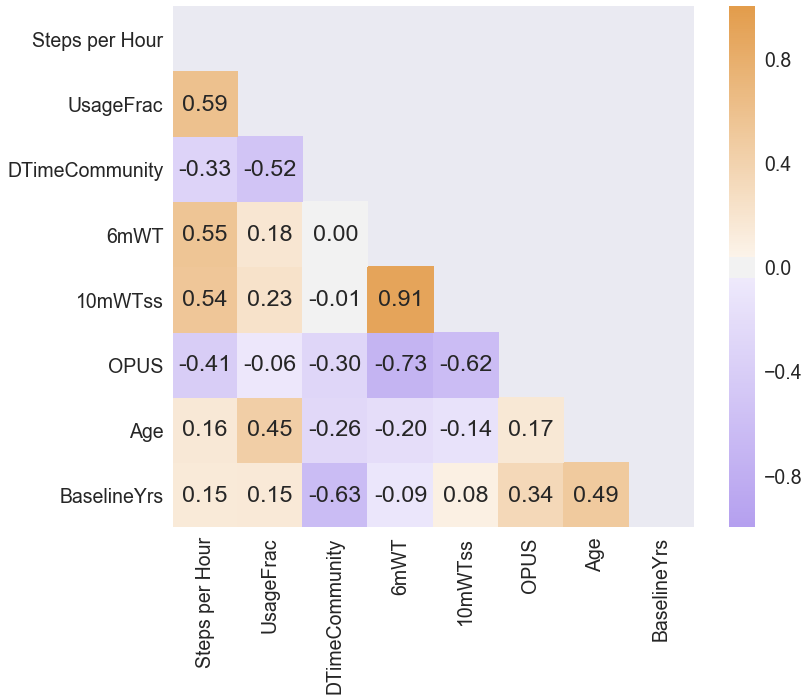

In [85]:
fcorr = Featsubj.drop(['NewBrace','SubjID'],axis=1)[['Steps per Hour','UsageFrac','DTimeCommunity','6mWT','10mWTss','OPUS','Age','BaselineYrs']].corr()
#generate an triangular correlation matrix
mask = np.zeros_like(fcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
sns.set_context('talk',font_scale=1.5)
plt.figure(figsize=(12,10))
# sns.heatmap(data=fcorr,mask=mask,cmap="PiYG",annot=True,fmt='.2f',square=True, vmin=-1, vmax=1)
sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=True,fmt='.2f',square=True, vmin=-1, vmax=1)
sns.set_context('talk',font_scale=1)
# plt.title('Pearson r - Personal Device Features')
plt.savefig('./corr_personal.jpg',dpi=400)

In [103]:
for x,y in itertools.combinations(Featsubj.drop('SubjID',axis=1).columns,2):
    r = pearsonr(Featsubj[x],Featsubj[y])
    if r[1]<.05:
        print(x,y,r)

BaselineYrs DTimeCommunity (-0.63141562589942468, 0.015440194558656974)
6mWT 10mWTss (0.91152655109468228, 5.7091777082319332e-06)
6mWT OPUS (-0.72866199270082044, 0.0031168326758296678)
6mWT Steps per Hour (0.55260278135863206, 0.040429634197862094)
10mWTss OPUS (-0.62066636705349321, 0.017860064926387205)
10mWTss Steps per Hour (0.53737397514147767, 0.047509739269136132)
Steps per Hour UsageFrac (0.59462844539166559, 0.024909459107757541)


/Users/nicholasshawen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [98]:
x = Featsubj['Steps per Hour']
y = Featsubj['6mWT']
print(pearsonr(x,y))
x = Featsubj['Steps per Hour']
y = Featsubj['10mWTss']
print(pearsonr(x,y))
x = Featsubj['UsageFrac']
y = Featsubj['6mWT']
print(pearsonr(x,y))
x = Featsubj['UsageFrac']
y = Featsubj['10mWTss']
print(pearsonr(x,y))
x = Featsubj['DTimeCommunity']
y = Featsubj['6mWT']
print(pearsonr(x,y))
x = Featsubj['DTimeCommunity']
y = Featsubj['10mWTss']
print(pearsonr(x,y))
x = Featsubj['OPUS']
y = Featsubj['Steps per Hour']
print(pearsonr(x,y))
x = Featsubj['OPUS']
y = Featsubj['UsageFrac']
print(pearsonr(x,y))
x = Featsubj['OPUS']
y = Featsubj['DTimeCommunity']
print(pearsonr(x,y))
x = Featsubj['OPUS']
y = Featsubj['6mWT']
print(pearsonr(x,y))
x = Featsubj['OPUS']
y = Featsubj['10mWTss']
print(pearsonr(x,y))
x = Featsubj['BaselineYrs']
y = Featsubj['DTimeCommunity']
print(pearsonr(x,y))
x = Featsubj['6mWT']
y = Featsubj['10mWTss']
print(pearsonr(x,y))


(0.55260278135863206, 0.040429634197862094)
(0.53737397514147767, 0.047509739269136132)
(0.1831249472197512, 0.53089312636554054)
(0.22820455867484699, 0.43263303382139828)
(1.0784433911634863e-05, 0.99997080620645984)
(-0.011726890082236652, 0.96826221684616176)
(-0.41295823534002668, 0.14222934517657862)
(-0.062898997543281626, 0.83084785739211175)
(-0.29610872130762955, 0.30398300990741778)
(-0.72866199270082044, 0.0031168326758296678)
(-0.62066636705349321, 0.017860064926387205)
(-0.63141562589942468, 0.015440194558656974)
(0.91152655109468228, 5.7091777082319332e-06)


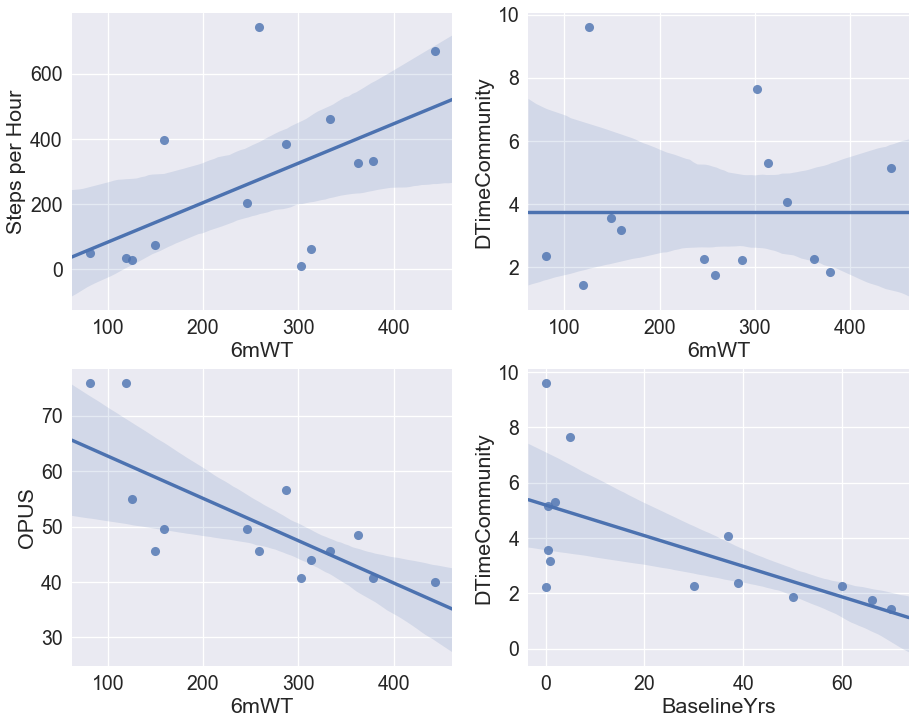

In [45]:
sns.set_context('talk',font_scale=1.5)
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.regplot(x='6mWT',y='Steps per Hour',data=Featsubj)
plt.subplot(222)
sns.regplot(x='6mWT',y='DTimeCommunity',data=Featsubj)
plt.subplot(223)
sns.regplot(x='6mWT',y='OPUS',data=Featsubj)
plt.subplot(224)
sns.regplot(x='BaselineYrs',y='DTimeCommunity',data=Featsubj)


In [41]:
Fboth = pd.concat((Featsubj,FeatsubjCBR),axis=0)

NameError: name 'FeatsubjCBR' is not defined

In [42]:
sns.despine()

NameError: name 'Fboth' is not defined

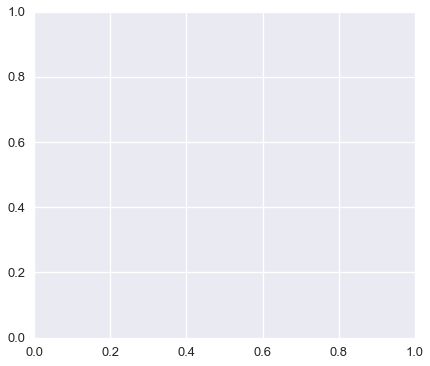

In [43]:
from scipy.stats import iqr

plt.figure(figsize=(15,6))
plt.subplot(121)
ax=sns.boxplot(x='NewBrace',y='6mWT',data=Fboth,hue='NewBrace')
ax.legend_.remove()
plt.xlabel('Device')
plt.xticks(np.arange(2),('Personal','C-brace'))
plt.subplot(122)
ax=sns.boxplot(x='NewBrace',y='10mWTss',data=Fboth,hue='NewBrace')
plt.xticks(np.arange(2),('Personal','C-brace'))
ax.legend_.remove()
#paired t-test
from scipy.stats import ttest_rel, shapiro
for f in ['6mWT','10mWTss']:
    x = Featsubj[f]
    y = FeatsubjCBR[f]
    tstat,prob = ttest_rel(x,y)
    print(f,tstat,prob)
    print(np.median(x),np.median(y))
    print(np.percentile(x,25),np.percentile(x,75),np.percentile(y,25),np.percentile(y,75))
    


In [44]:
np.percentile(x,75)

4.8793402803333334

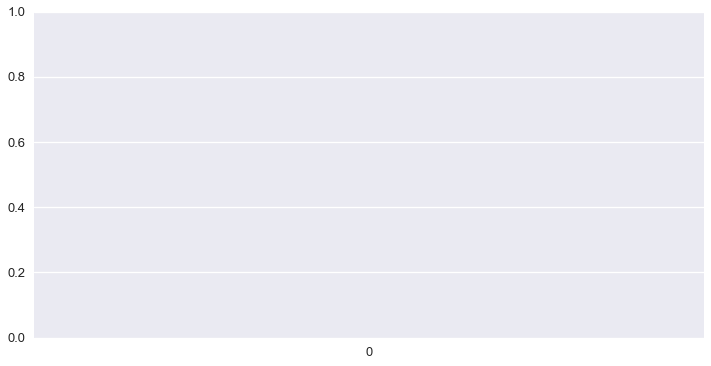

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot()

In [46]:
# confidence interval analysis

In [47]:
# F = Featsubj.drop(['NewBrace','SubjID'],axis=1)
# for i in F.columns:
#     for j in F.columns:
#         print(i,j)
#         x = Featsubj[i]
#         y = Featsubj[j]
#         print(pearsonr(x,y))

In [48]:
# f = 'UsageFrac'
# x = Fboth[Fboth['NewBrace']==0][f]
# y = Fboth[Fboth['NewBrace']==1][f]
# plt.figure(figsize=(8,6))
# plt.scatter(x,y)    
# mx=min(x)
# my=min(y)
# m = min(mx,my)
# Mx=max(x)
# My=max(y)
# M =max(Mx,My)
# plt.plot([m,M],[m,M])
# plt.title('Usage Fraction')
# plt.xlabel('Personal device')
# plt.xlabel('C-brace')

## Cbrace mobility 

In [49]:
FeatsubjCBR = pd.DataFrame(data=[],columns=['SubjID','Age','BaselineYrs','6mWT','10mWTss','DTimeCommunity',
                                         'Steps per Hour','UsageFrac'])

In [50]:
Featsubj

,SubjID,NewBrace,Age,BaselineYrs,6mWT,10mWTss,OPUS,Steps per Hour,UsageFrac,DTimeCommunity
0,CBR21,0,65,60.00,246.46,0.70,49.59,202.599660,0.625459,2.273333
1,CBR30,0,55,37.00,333.45,0.99,45.66,462.174627,0.982844,4.069028
2,CBR22,0,28,2.00,313.69,0.93,43.94,60.862118,0.734635,5.292222
3,CBR27,0,72,70.00,119.18,0.44,75.87,35.454795,0.978453,1.430417
4,CBR26,0,52,0.50,443.20,1.22,39.93,670.040958,0.997807,5.149444
5,CBR11,0,35,5.00,302.49,0.65,40.72,8.740960,0.020286,7.633333
6,CBR16,0,44,1.00,159.05,0.38,49.59,397.321966,1.000000,3.177222
7,CBR28,0,44,0.08,286.89,0.57,56.65,383.653943,0.932507,2.227500
8,CBR15,0,68,0.50,149.15,0.44,45.66,74.626844,0.946003,3.573889
9,CBR25,0,68,66.00,258.17,0.78,45.66,743.733957,0.983914,1.756667


In [51]:
FeatsubjCBR

,SubjID,Age,BaselineYrs,6mWT,10mWTss,DTimeCommunity,Steps per Hour,UsageFrac


In [52]:
ind = 0
for s in Data.SubjID.unique():

    ind+=1
    Data_ = Data[(Data['SubjID']==s)&(Data['NewBrace']==1)]
    
    #mobility index
    dhome = homedur[(homedur['SubjID']==s) & (homedur['NewBrace']==0)]['Daily Duration']
    dcomm = dur[(dur['SubjID']==s) & (dur['NewBrace']==1)]['Daily Duration']
    mobilityindex = dcomm.values#/dhome.values

#     UsageFrac = np.nansum(Data_['Wear Frac']*Data_['Duration'])/(np.nansum(Data_['Duration'])+1e-16)
    UsageFrac = np.nanmean(Data_['Wear Frac'])

#     steps = np.nanmean(Data_['Steps'])
    stepsHr = np.nanmean(Data_['Steps per Hour'])



    fpd=(pd.DataFrame({'SubjID':s,'Age':Data_['Age'].unique(),
                       'BaselineYrs': Data_['BaselineYrs'].unique(), 
                      '6mWT':Data_['6mwt'].unique(), '10mWTss':Data_['10mwt_ss'].unique(), 
                       'DTimeCommunity':mobilityindex,'UsageFrac':UsageFrac,
                       'Steps per Hour':stepsHr},index=[ind]))
    
    FeatsubjCBR=pd.concat([FeatsubjCBR,fpd])



In [53]:
#add OPUS data
OPUSdata= pd.read_excel('OPUS.xlsx')
sid = OPUSdata.SubjID
newstr = []
for s in sid.values:
    newstr.append(s.replace('-',''))
OPUSdata.SubjID = newstr

In [54]:
FeatsubjCBR = pd.merge(left=FeatsubjCBR,right=OPUSdata[OPUSdata['NewBrace']==1],how='inner',left_on=['SubjID'],right_on=['SubjID'])

In [55]:
FeatsubjCBR=FeatsubjCBR.rename(index=str,columns={'UsageFrac':'UsageFrac'})

In [56]:
Featsubj.columns

Index(['SubjID', 'NewBrace', 'Age', 'BaselineYrs', '6mWT', '10mWTss', 'OPUS',
       'Steps per Hour', 'UsageFrac', 'DTimeCommunity'],
      dtype='object')

In [57]:
F = FeatsubjCBR.copy()
F = (FeatsubjCBR.drop(['SubjID','NewBrace','Age','BaselineYrs'],axis=1)
     -Featsubj.drop(['SubjID','NewBrace','Age','BaselineYrs'],axis=1))

In [106]:
Fdiff = pd.concat((F,Featsubj[['SubjID','Age','BaselineYrs']]),axis=1)

In [107]:
Fdiff.head()

,10mWTss,6mWT,DTimeCommunity,OPUS,Steps per Hour,UsageFrac,SubjID,Age,BaselineYrs
0,-0.01,-14.53,3.322500,-4.80,-189.121613,-0.592380,CBR21,65,60.0
1,0.21,118.72,3.319861,-5.73,-75.810132,-0.044837,CBR30,55,37.0
2,0.07,18.92,-1.007222,3.58,161.622207,0.111041,CBR22,28,2.0
3,0.02,14.42,-0.939028,-34.36,65.323316,0.021547,CBR27,72,70.0
4,-0.07,68.94,-2.740833,29.19,-308.988035,-0.023049,CBR26,52,0.5


In [108]:
Fdiff=Fdiff.rename(index=str,columns={'UsageFrac':'UsageFrac'})

/Users/nicholasshawen/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


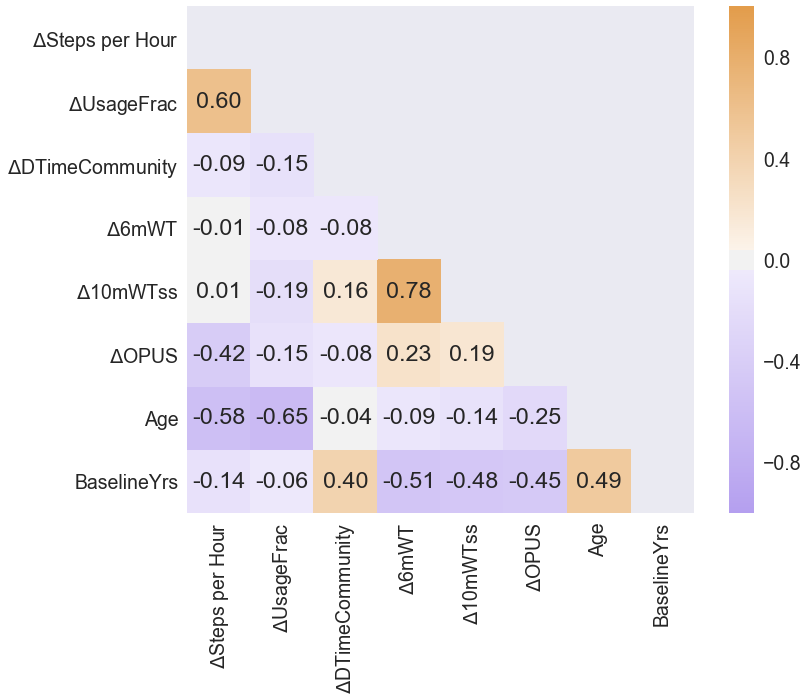

In [109]:
# Fdiff=Fdiff[['SubjID','Age','BaselineYrs','6mWT','10mWTss','OPUS','Steps per Hour',
#                    'UsageFrac','DTimeCommunity']]
Fdiff=Fdiff[['SubjID','Steps per Hour', 'UsageFrac','DTimeCommunity','6mWT','10mWTss','OPUS','Age','BaselineYrs']]
Fdiff.rename(columns={'Steps per Hour': r'$\Delta$Steps per Hour', 'UsageFrac': r'$\Delta$UsageFrac', 
                      'DTimeCommunity': r'$\Delta$DTimeCommunity', '6mWT': r'$\Delta$6mWT', 
                      '10mWTss': r'$\Delta$10mWTss', 'OPUS': r'$\Delta$OPUS'}, inplace=True)
fcorr = Fdiff.drop(['SubjID'],axis=1).corr()

mask = np.zeros_like(fcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(275, 45, 80, 70, as_cmap=True)
sns.set_context('talk',font_scale=1.5)
plt.figure(figsize=(12,10))
sns.heatmap(data=fcorr,mask=mask,cmap=cmap,annot=True,fmt='.2f',square=True, vmin=-1, vmax=1)
sns.set_context('talk',font_scale=1)
plt.savefig('DiffCorr.jpg', dpi=400)
# plt.title('Pearson r - Difference Features between C-brace and Personal device')

In [104]:
for x,y in itertools.combinations(Fdiff.drop('SubjID',axis=1).columns,2):
    r = pearsonr(Fdiff[x],Fdiff[y])
    if r[1]<.05:
        print(x,y,r)

$\Delta$Steps per Hour $\Delta$UsageFrac (0.60434398216392493, 0.022071259670943876)
$\Delta$Steps per Hour Age (-0.57935986372789317, 0.029911599136684092)
$\Delta$UsageFrac Age (-0.64654414257528114, 0.01246763210757784)
$\Delta$6mWT $\Delta$10mWTss (0.77555260606341858, 0.0011158486693563976)


In [91]:
fcorr.columns

Index(['Steps per Hour', '$\Delta$UsageFrac', 'DTimeCommunity', '6mWT',
       '10mWTss', 'OPUS', 'Age', 'BaselineYrs'],
      dtype='object')

In [62]:
Fdiff.head()

,SubjID,Steps per Hour,UsageFrac,DTimeCommunity,6mWT,10mWTss,OPUS,Age,BaselineYrs
0,CBR21,-189.121613,-0.592380,3.322500,-14.53,-0.01,-4.80,65,60.0
1,CBR30,-75.810132,-0.044837,3.319861,118.72,0.21,-5.73,55,37.0
2,CBR22,161.622207,0.111041,-1.007222,18.92,0.07,3.58,28,2.0
3,CBR27,65.323316,0.021547,-0.939028,14.42,0.02,-34.36,72,70.0
4,CBR26,-308.988035,-0.023049,-2.740833,68.94,-0.07,29.19,52,0.5


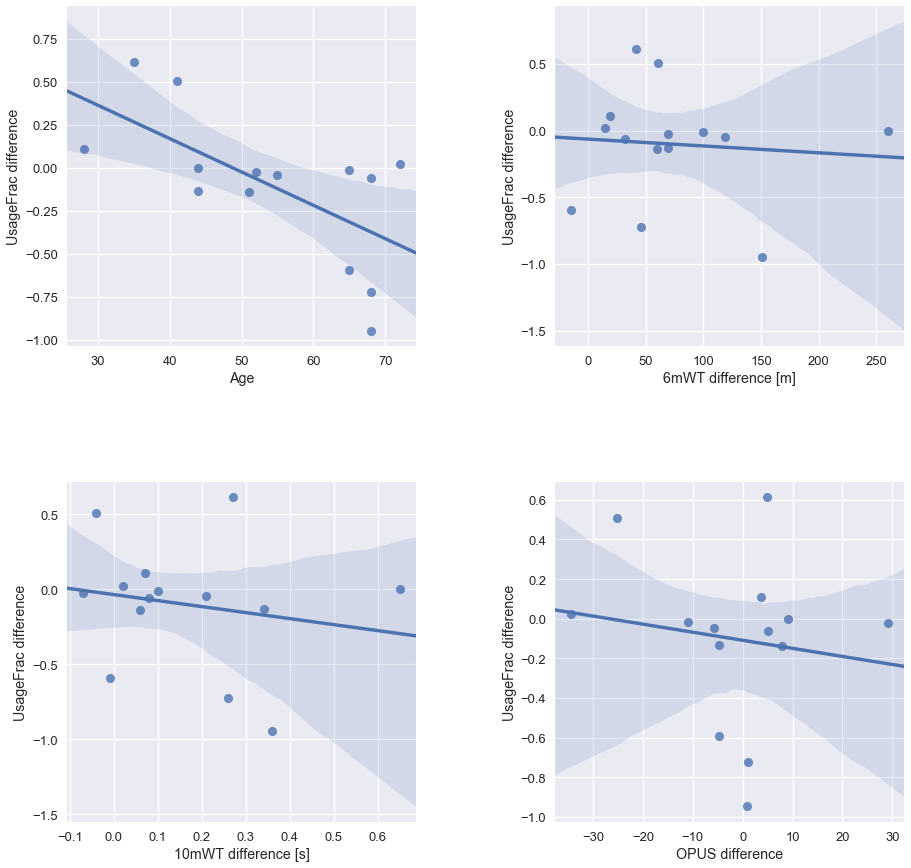

In [63]:
# sns.set_context('talk',font_scale=1.5)
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.regplot(x='Age',y='UsageFrac',data=Fdiff)
plt.ylabel('UsageFrac difference')
plt.subplot(222)
sns.regplot(x='6mWT',y='UsageFrac',data=Fdiff)
plt.xlabel('6mWT difference [m]')
plt.ylabel('UsageFrac difference')
plt.subplot(223)
sns.regplot(x='10mWTss',y='UsageFrac',data=Fdiff)
plt.xlabel('10mWT difference [s]')
plt.ylabel('UsageFrac difference')
plt.subplot(224)
sns.regplot(x='OPUS',y='UsageFrac',data=Fdiff)
plt.xlabel('OPUS difference')
plt.ylabel('UsageFrac difference')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=0.4)

-0.648892996623 -0.963645553031 -0.36694221503


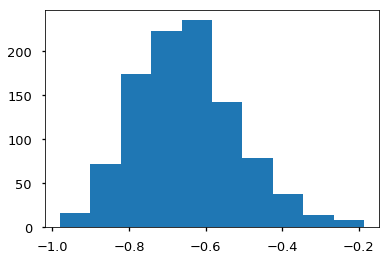

In [117]:
#resample correlations to bootstrap 95%CI
xyboot = []; r_boot =[]
xy = Fdiff[['UsageFrac','Age']]
for k in range(1000):
    inds = np.random.choice(xy.index,len(xy.index)) #sample indices w replacement
    vals = xy.iloc[inds].values
    r = pearsonr(vals[:,0],vals[:,1]) #compute corr coefficient on bootstrap replica
    r_boot.append(r[0]) #store corr coeff

plt.hist(r_boot)
mu = np.mean(r_boot)
print(mu,np.percentile(r_boot,0.25),np.percentile(r_boot,97.5))

In [115]:
np.p

array([10,  0])

In [99]:
np.percentile(r_boot,97.5)

-0.33930873505146458

In [73]:
vals = xy.iloc[np.array([0,2,3])].values

In [112]:
x = Fdiff['Steps per Hour']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['6mWT']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['10mWTss']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['10mWTss']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['10mWTss']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['OPUS']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['OPUS']
print(pearsonr(x,y))
x = Fdiff['DTimeCommunity']
y = Fdiff['OPUS']
print(pearsonr(x,y))

x = Fdiff['Steps per Hour']
y = Fdiff['Age']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['Age']
print(pearsonr(x,y))
x = Fdiff['BaselineYrs']
y = Fdiff['DTimeCommunity']
print(pearsonr(x,y))
x = Fdiff['BaselineYrs']
y = Fdiff['6mWT']
print(pearsonr(x,y))
x = Fdiff['UsageFrac']
y = Fdiff['OPUS']
print(pearsonr(x,y))

(-0.0093011021795821464, 0.97482525568656486)
(-0.083864255883296018, 0.77561566176742236)
(-0.083035445434608515, 0.77778223613865505)
(0.014836525038428475, 0.95985179379654972)
(-0.1875291440728305, 0.52088241697670723)
(0.15641246277816606, 0.59335308046377011)
(-0.42090976001189245, 0.13394439612967199)
(-0.1473328917394667, 0.61522434384588243)
(-0.082877155062630409, 0.7781961906151279)
(-0.57935986372789317, 0.029911599136684092)
(-0.64654414257528114, 0.01246763210757784)
(0.39729851678828448, 0.15952766045946445)
(-0.50617952475326855, 0.064766546479358228)
(-0.1473328917394667, 0.61522434384588243)


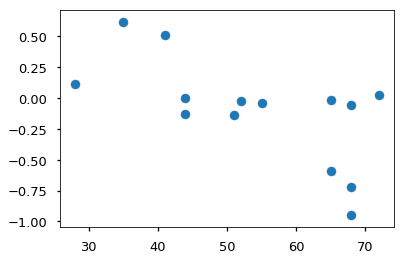

In [58]:
plt.scatter(Fdiff['Age'],Fdiff['UsageFrac'])

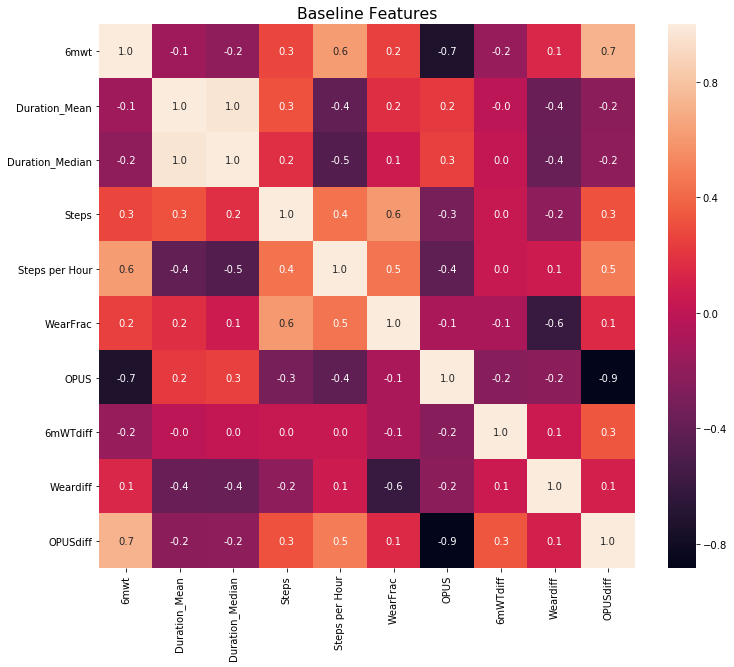

In [26]:
D = homedur[homedur['NewBrace']==0].drop('SubjID',axis=1)

D['6mWTdiff']=homedur.loc[homedur['NewBrace']==1,'6mwt'].values-homedur.loc[homedur['NewBrace']==0,'6mwt'].values
D['Weardiff']=homedur.loc[homedur['NewBrace']==1,'UsageFrac'].values-homedur.loc[homedur['NewBrace']==0,'UsageFrac'].values
D['OPUSdiff']=homedur.loc[homedur['NewBrace']==1,'OPUS'].values-homedur.loc[homedur['NewBrace']==0,'OPUS'].values

fcorr = D.drop('NewBrace',axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1)
plt.title('Baseline Features')

In [27]:
homeTemp = homedur[['NewBrace','SubjID','UsageFrac']].rename(columns={'UsageFrac':'HomeUsageFrac'})
Featsubj = pd.merge(left = Featsubj,right = homeTemp, how='inner', left_on = ['NewBrace','SubjID'], 
         right_on = ['NewBrace','SubjID'])

In [28]:
Featsubj.head()

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,Npoints,Steps,Steps per Hour,SubjID,WearFrac,top2RelDur,OPUS,HomeWearFrac
0,0.85,0.69,231.93,65,60.0,2.061553,1.507332,0.107750,0.661944,1.015304,1,39,67,2.283582,13.478047,CBR21,0.033078,0.665099,44.79,0.019349
1,1.47,1.20,452.17,55,37.0,2.853499,-1.798453,0.021663,0.411111,0.921783,1,83,174,286.632184,386.364495,CBR30,0.938007,0.471777,39.93,0.360443
2,1.20,1.00,332.61,28,2.0,1.817652,-0.853575,0.022623,0.511111,0.828132,1,29,51,96.019608,222.484325,CBR22,0.845676,0.686630,47.52,0.847683
3,0.63,0.46,133.60,72,70.0,0.471462,-4.816799,0.007647,0.491389,2.330390,1,2,2,51.000000,100.778111,CBR27,1.000000,1.000000,41.51,0.004478
4,1.58,1.15,512.14,52,0.5,2.367757,-4.421965,0.005246,0.224167,0.658080,1,33,77,134.064935,361.052923,CBR26,0.974758,0.506524,69.12,0.050284


## Cbrace vs Baseline features

In [29]:
#** Regression Analysis **
# from scipy import stats
# features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','UsageFrac']
# outcome = ['UsageFrac']

# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     x-y
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x.values.astype('float32'),(y.values-x.values).astype('float32'))
#     print(f, slope,intercept,p_value)
#     plt.figure(figsize=(8,6))
#     sns.regplot(x.astype('float32'),(y.values-x.values).astype('float32'))

In [30]:
Featsubj

NameError: name 'Featsubj' is not defined

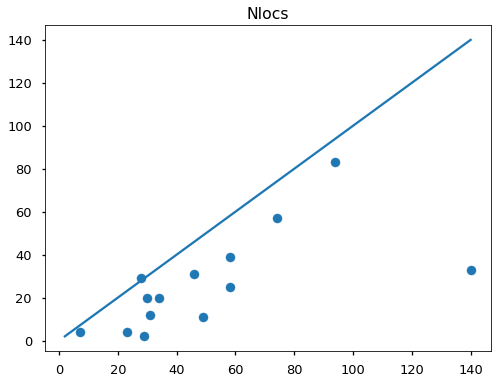

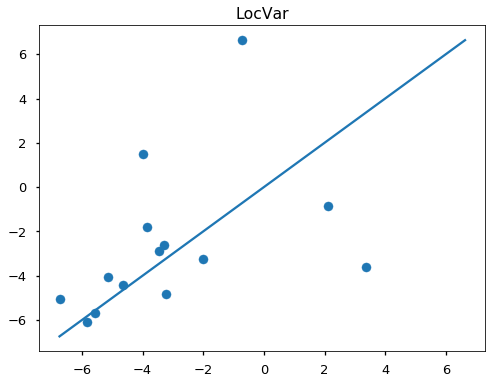

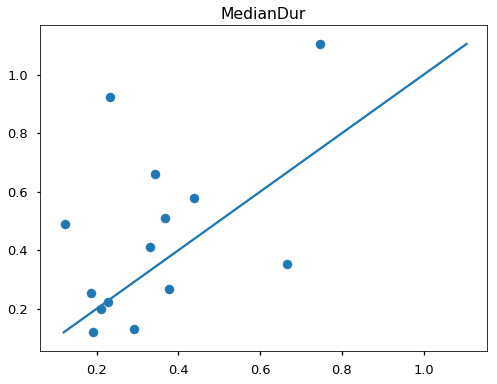

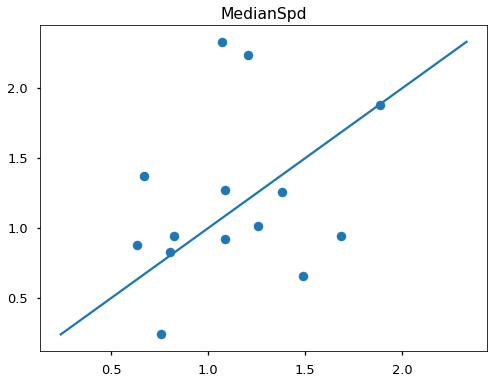

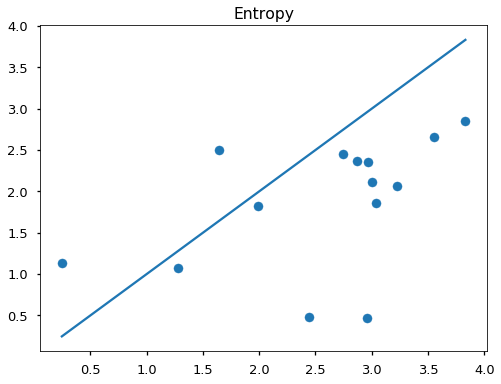

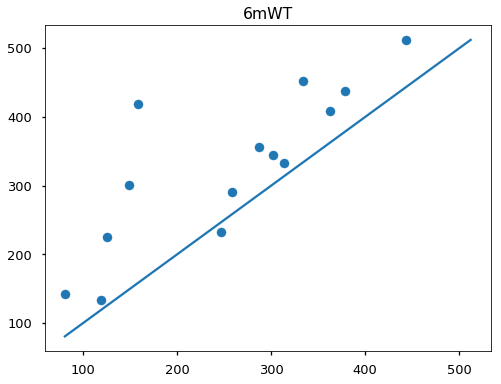

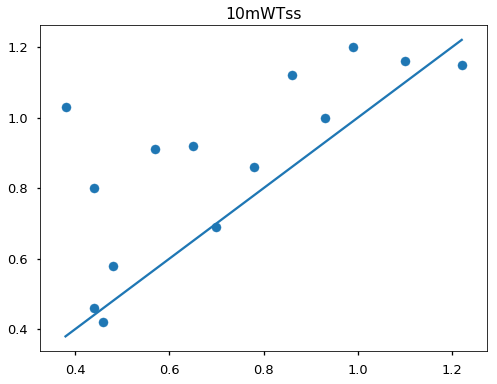

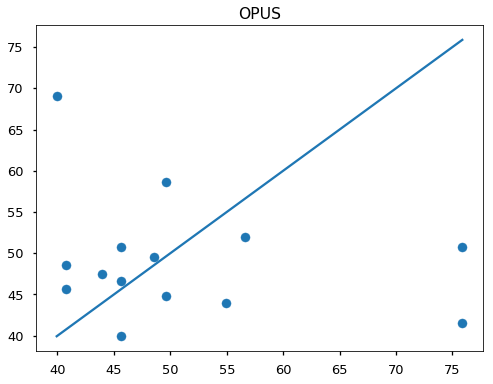

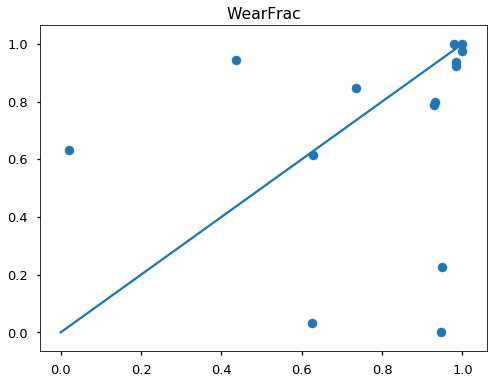

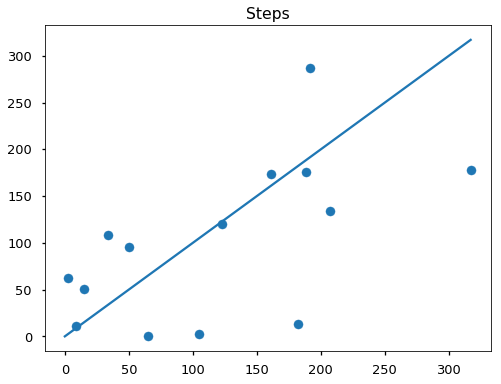

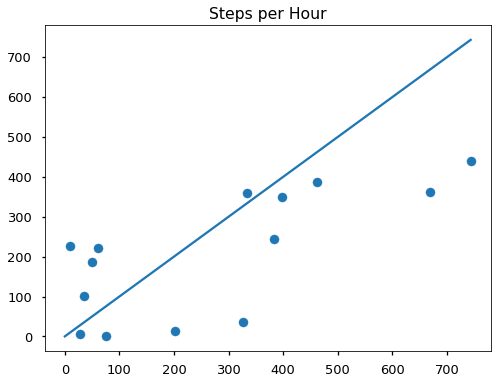

In [31]:
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','OPUS','UsageFrac', 'Steps', 'Steps per Hour']
outcome = ['UsageFrac']

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)    
    mx=min(x)
    my=min(y)
    m = min(mx,my)
    Mx=max(x)
    My=max(y)
    M =max(Mx,My)
    plt.plot([m,M],[m,M])
    plt.title(f)
    if f == 'MeanDistHome':
        plt.xlim([-10,200])
        plt.ylim([-10,200])
    
    


In [249]:
# #shapiro test for normality - sanity check
# for i in range(1,4):
#     n = 10**i
#     x = np.random.randn(n)
#     y = np.random.randn(n)
#     fstat,pval = shapiro(x-y)
#     print(n,fstat,pval)

In [248]:
# #normality test
# from scipy.stats import ttest_rel, shapiro

# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     fstat,pval = shapiro(x)
#     print(f,tstat,pval)

## t-test / non-parametric comparisons between baseline and cbrace features

In [250]:
# #paired t-test
# from scipy.stats import ttest_rel, shapiro
# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     tstat,prob = ttest_rel(x,y)
#     print(f,tstat,prob)
    


In [32]:
from scipy.stats import wilcoxon
for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    tstat,prob = wilcoxon(x,y)
    print(f,tstat,prob)


Nlocs 1.0 0.0012114149768
LocVar 43.0 0.550923682773
MedianDur 32.0 0.198122911754
MedianSpd 48.0 0.777564616857
Entropy 13.0 0.0131503642343
6mWT 2.0 0.00152327574137
10mWTss 10.0 0.00763041473925
OPUS 51.0 0.924978307121
WearFrac 28.0 0.221330082994
Steps 43.0 0.550923682773
Steps per Hour 33.0 0.220898890668


## Pairwise correlations between baseline features and Cbrace Wear Time